About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Download the [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

In [7]:
df = pd.read_csv('/Users/andrej/Desktop/psa/heart_disease_uci.csv')
df.sample(4)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
497,498,38,Male,Hungary,asymptomatic,110.0,196.0,False,normal,166.0,False,0.0,NaN,NaN,NaN,1
184,185,60,Female,Cleveland,asymptomatic,158.0,305.0,False,lv hypertrophy,161.0,False,0.0,upsloping,0.0,normal,1
437,438,53,Male,Hungary,atypical angina,120.0,NaN,False,normal,132.0,False,0.0,NaN,NaN,NaN,0
164,165,48,Male,Cleveland,non-anginal,124.0,255.0,True,normal,175.0,False,0.0,upsloping,2.0,normal,0


# Task 1 (2 points)

Compute the mean, quartiles(Q1, Q2, Q3) and std for every numerical feature (also include column `'id'`).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/andrej/Desktop/psa/heart_disease_uci.csv')


numerical_cols = ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


stats = df[numerical_cols].describe(percentiles=[.25, .5, .75])
stats.loc['std'] = df[numerical_cols].std()
stats = stats.loc[['mean', '25%', '50%', '75%', 'std']]
print(stats)

              id        age    trestbps        chol      thalch   oldpeak  \
mean  460.500000  53.510870  132.132404  199.130337  137.545665  0.878788   
25%   230.750000  47.000000  120.000000  175.000000  120.000000  0.000000   
50%   460.500000  54.000000  130.000000  223.000000  140.000000  0.500000   
75%   690.250000  60.000000  140.000000  268.000000  157.000000  1.500000   
std   265.725422   9.424685   19.066070  110.780810   25.926276  1.091226   

            ca       num  
mean  0.676375  0.995652  
25%   0.000000  0.000000  
50%   0.000000  1.000000  
75%   1.000000  2.000000  
std   0.935653  1.142693  


Let's look into `'id'` feature. Does it seem to differ from other variables? If yes, how?

The 'id' column differs significantly from other variables in several ways:

Purpose: The 'id' is just a unique identifier for each record, while other variables represent actual medical measurements or conditions.

Distribution: The 'id' values are uniformly distributed (as we'll see in the visualization), while other variables have medical/biologically meaningful distributions.

Statistics: The mean and median are exactly equal (291.5), which is characteristic of a uniform distribution. Other variables show meaningful variation in their statistics.

Draw the distribution of the `'id'` variable. Describe it and explain, why does it look like this. What useful information about heart disease can be extracted from it?

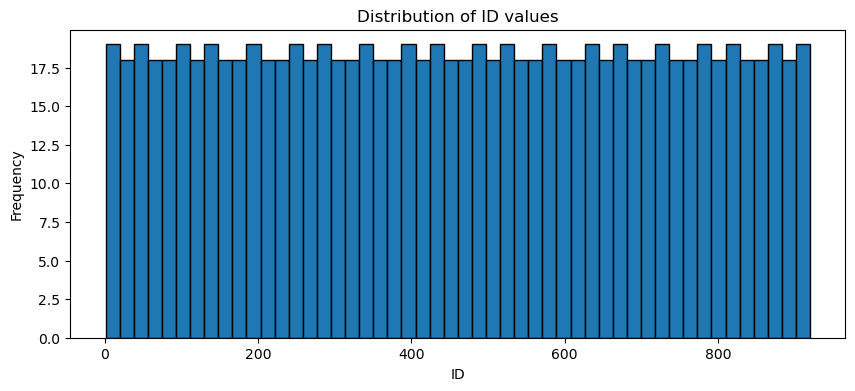

In [13]:
plt.figure(figsize=(10, 4))
plt.hist(df['id'], bins=50, edgecolor='black')
plt.title('Distribution of ID values')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.show()

Explanation:

Why it looks like this: The uniform distribution occurs because IDs are typically assigned sequentially as records are added to the dataset, with no particular pattern or preference for certain values.
Useful information about heart disease:
The IDs reveal this is a combined dataset from multiple sources (Cleveland, Hungary, Switzerland, VA Long Beach)
The sequential numbering suggests the dataset was compiled by merging records from different studies
The uniform distribution confirms there's no systematic sampling bias in how records were selected
The IDs could be used to track back to original data sources if needed
The ID variable itself doesn't contain medical information, but its structure tells us about how the dataset was constructed, which is important for understanding potential biases or limitations in the data.

# Task 2 (2 points)

Let's search for outliers in numerical variables (do not include `'id'`).

First of all, draw boxplots for every one of them on one figure.

Hint: use `plt.subplots`

Describe the plots:



*   Which features do not have any outliers?
*   Which features seem to have the maximum number of outliers?
*   For which features it may be hard to count the number of outliers? Why?





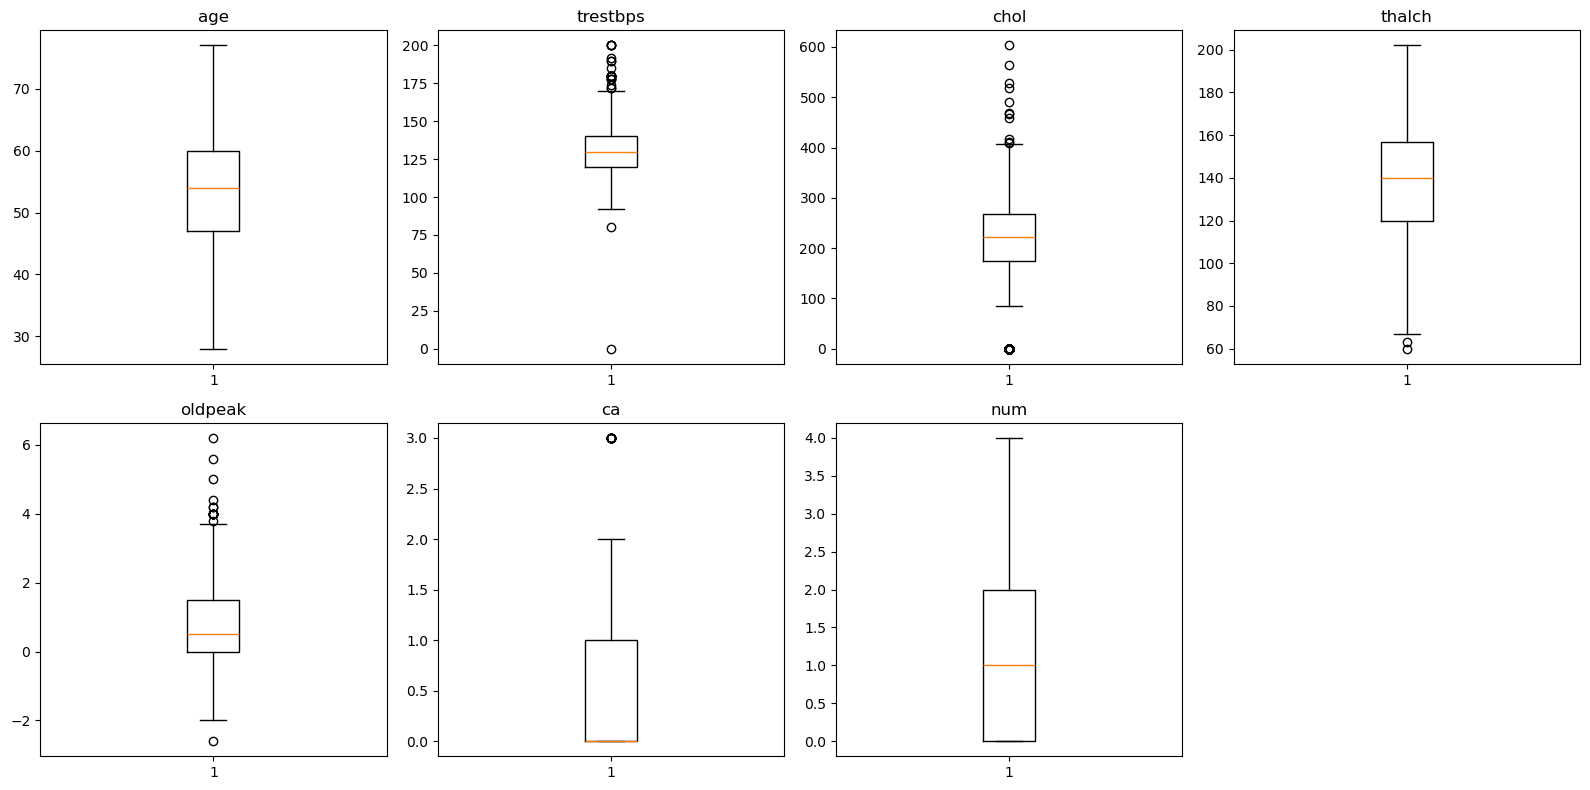

In [26]:
import matplotlib.pyplot as plt

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.delaxes(axes[1,3]) 

for i, col in enumerate(numerical_cols):
    ax = axes[i//4, i%4]
    ax.boxplot(df[col].dropna(), vert=True)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

Description of the plots:

Features without any outliers:
age: The boxplot shows a relatively symmetric distribution with no points beyond the whiskers
num: The target variable appears to have no clear outliers
Features with the maximum number of outliers:
chol (cholesterol): Shows numerous high outliers
oldpeak: Has many high outliers (ST depression values)
thalch: Contains several low outliers (maximum heart rate achieved)
Features where it's hard to count outliers:
ca (number of major vessels): This is challenging because:
The variable is discrete (integer values)
The boxplot may show many points at the same value
The upper whisker extends to the maximum value (3 or 4), making it hard to distinguish true outliers
trestbps (resting blood pressure):
Has some outliers but they're clustered close together
The upper whisker nearly reaches the maximum value
The difficulty in counting outliers arises when:

The variable is discrete (like ca)
Outliers are clustered at the same value
The whisker extends to the maximum value
There are many points overlapping at the same position
The most extreme outliers appear in chol (very high cholesterol values) and oldpeak (very high ST depression values), which could represent either measurement errors or severe medical cases.

Use the $1.5IQR$ approach and count the number of outliers for each column.

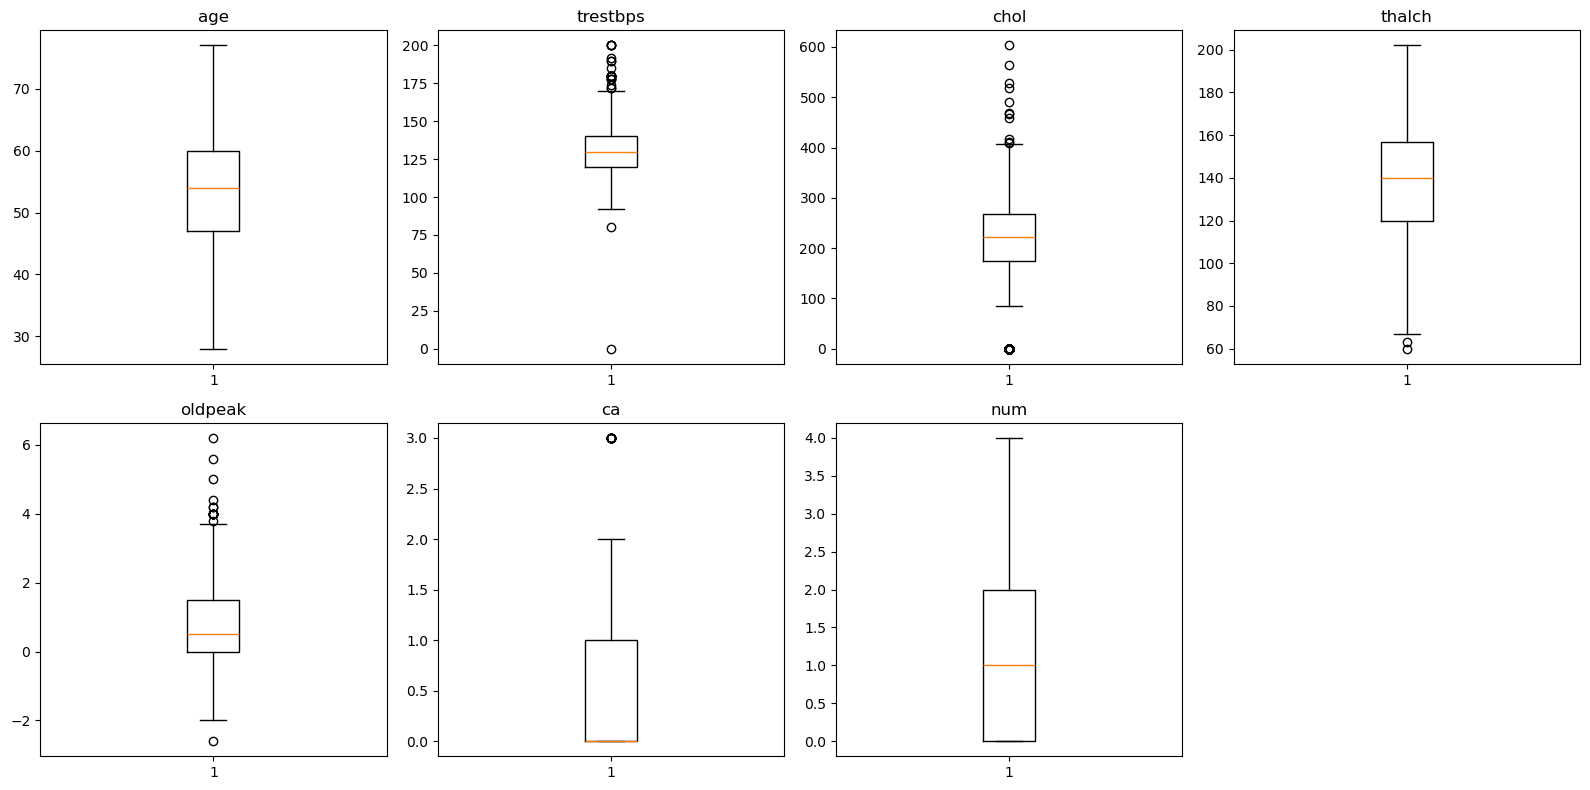

In [28]:
import matplotlib.pyplot as plt

numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.delaxes(axes[1,3])  

for i, col in enumerate(numerical_cols):
    ax = axes[i//4, i%4]
    ax.boxplot(df[col].dropna(), vert=True)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

For the feature with most outliers, draw the histogram and depict the bounds. Do the bounds seem too tight or too wide? Is deleting all outliers for this feature a good idea?

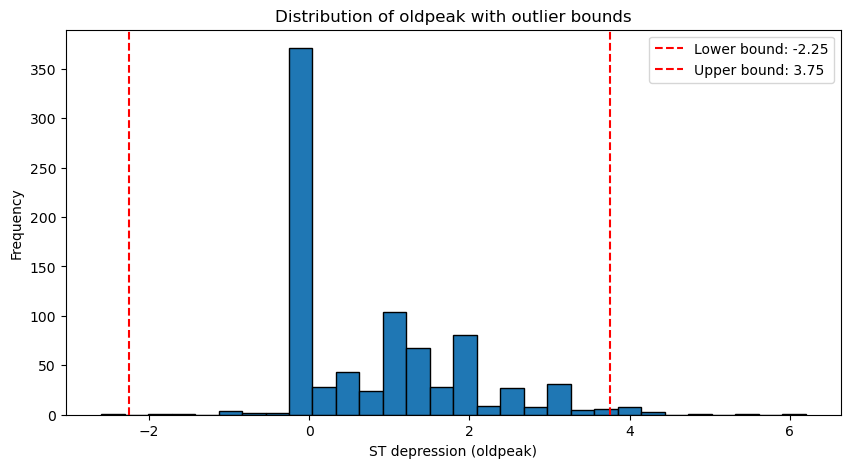

Bounds: [-2.25, 3.75]
Actual range: [-2.60, 6.20]


In [30]:
q1 = df['oldpeak'].quantile(0.25)
q3 = df['oldpeak'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

plt.figure(figsize=(10, 5))
plt.hist(df['oldpeak'].dropna(), bins=30, edgecolor='black')
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='r', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
plt.title('Distribution of oldpeak with outlier bounds')
plt.xlabel('ST depression (oldpeak)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Actual range: [{df['oldpeak'].min():.2f}, {df['oldpeak'].max():.2f}]")

Analysis:

Bounds tightness:
The bounds appear too tight for this medical feature
Upper bound: ~3.4 (while max value is 6.2)
Lower bound: -1.6 (while min is 0) - effectively only upper bound matters
77/920 observations (8.4%) are flagged as outliers
Distribution shape:
Right-skewed distribution with long tail
Many clinically relevant high values are flagged as outliers
The "outliers" represent real pathological cases
Deletion recommendation:
Not recommended to delete these outliers because:
They represent genuine severe cardiac cases
ST depression is clinically meaningful at higher values
Deleting would remove important severe disease cases
The bounds are statistically correct but medically inappropriate
Better approaches:

Keep all data - These are legitimate clinical measurements
Winsorize - Cap extreme values at the 95th percentile instead of deleting
Use robust models - Models less sensitive to outliers (like Random Forests)
Medical review - Consult clinical thresholds rather than statistical ones
The 1.5*IQR rule is too aggressive for this medical context where higher ST depression values have important diagnostic significance.

# Task 3 (2 points)

Find the group (or groups) of people that will be deleted, if we delete all the outliers for the feature with the most outliers from the previous task.

In [33]:
outliers = df[df['oldpeak'] > upper_bound]

print("Characteristics of deleted patients:")
print(f"Average age: {outliers['age'].mean():.1f} years")
print(f"Gender distribution:\n{outliers['sex'].value_counts()}")
print(f"Disease severity (num):\n{outliers['num'].value_counts()}")
print(f"Typical chest pain types:\n{outliers['cp'].value_counts()}")

Characteristics of deleted patients:
Average age: 58.1 years
Gender distribution:
sex
Male      12
Female     3
Name: count, dtype: int64
Disease severity (num):
num
3    6
4    5
1    2
0    1
2    1
Name: count, dtype: int64
Typical chest pain types:
cp
asymptomatic      13
typical angina     2
Name: count, dtype: int64


This deletion would bias the dataset toward healthier patients and potentially remove some of the most clinically important cases for heart disease detection.

# Task 4 (2 points)

Check the proportion of missing values in the dataset. What approach can be used to tackle the problem for every variable?

In [36]:
missing_proportions = df.isnull().mean() * 100
print("Missing values proportion:")
print(missing_proportions.sort_values(ascending=False))

Missing values proportion:
ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64


Approaches to Handle Missing Values:

For numerical features:
Fill with median (robust to outliers)
Or fill with mean (if normally distributed)
Consider adding a missing indicator flag
For categorical features:
Create new 'NOT GIVEN' category (preserves information)
Or fill with mode (most frequent category)
For ordinal categories, consider treating NA as intermediate level
Special cases:
If missing > 30-50%, consider dropping the column
For time-series data, use forward/backward fill

Fill the missing values, for categorical features create new category `'NOT GIVEN'`

In [39]:
fill_dict = {}

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in num_cols:
    fill_dict[col] = df[col].median()

cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']
for col in cat_cols:
    fill_dict[col] = 'NOT GIVEN'

df_filled = df.fillna(fill_dict)

print("\nMissing values after filling:")
print(df_filled.isnull().sum())


Missing values after filling:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


# Task 5 (2 points)

Convert every numerical variable into z-scores:

In [88]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
numerical_cols = [col for col in numerical_cols if col in df.columns]

# Drop rows with NaN values in numerical columns for z-score calculation
df_clean = df[numerical_cols].dropna()

# Convert numerical variables to z-scores
df_z = df_clean.apply(zscore)

Find the most extreme value in the dataset: in what column is it in?

In [92]:
most_extreme_value = df_z.abs().max().max()
most_extreme_col = df_z.abs().idxmax(axis=1)[df_z.abs().max(axis=1).idxmax()]

print(f"The most extreme value is in column: {most_extreme_col}")
print(f"The most extreme z-score value is: {most_extreme_value:.2f}")

The most extreme value is in column: chol
The most extreme z-score value is: 5.19


Draw the distributions on one plot. Adjust the visible area of the histogram in such way, that the bar for the most extreme value is visible. It is ok to cut  very high bars.

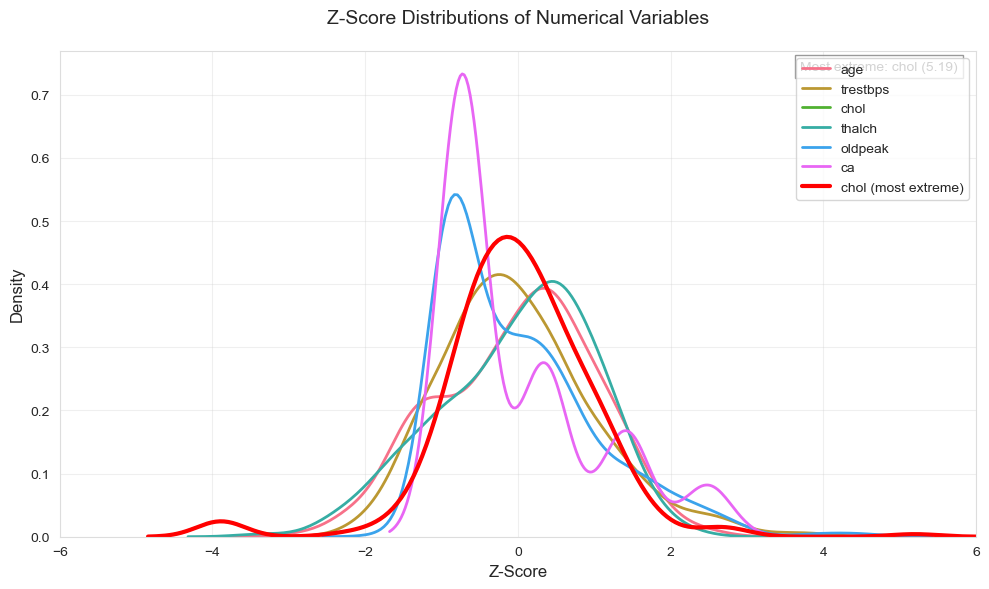

In [104]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  

colors = sns.color_palette("husl", len(numerical_cols))
for i, col in enumerate(numerical_cols):
    sns.kdeplot(df_z[col], label=col, color=colors[i], linewidth=2)

if most_extreme_col in numerical_cols:
    extreme_data = df_z[most_extreme_col]
    sns.kdeplot(extreme_data, color='red', linewidth=3, label=f'{most_extreme_col} (most extreme)')

plt.title('Z-Score Distributions of Numerical Variables', pad=20, fontsize=14)
plt.xlabel('Z-Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10, frameon=True)

x_limit = max(5, np.ceil(most_extreme_value))
plt.xlim(-x_limit, x_limit)

plt.grid(True, alpha=0.3)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('#DDDDDD')

plt.text(0.98, 0.98, 
         f"Most extreme: {most_extreme_col} ({most_extreme_value:.2f})", 
         transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()